In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sktime.forecasting.theta               import ThetaForecaster
from sktime.forecasting.base                import ForecastingHorizon
from sklearn.metrics                        import mean_squared_error

from darts.models                       import NaiveSeasonal, ExponentialSmoothing
from darts.utils.utils                  import ModelMode,SeasonalityMode
from darts                              import TimeSeries

In [3]:
pdf = pd.read_csv("../data/monthly/ewz_stromabgabe_netzebenen_stadt_zuerich.csv",index_col=None)

pdf.index = pd.to_datetime(pdf['Timestamp'],utc=True)
pdf.index = pdf.index.tz_localize(None)  
pdf["y"] = pdf["NE7_GWh"].values
pdf = pdf.drop(columns=["Timestamp","NE5_GWh","NE7_GWh"])


split = len(pdf)-12
pdf_train, pdf_test = pdf.iloc[:split], pdf.iloc[split:]

In [4]:
ytrain = TimeSeries.from_dataframe(pdf_train)
ytest  = TimeSeries.from_dataframe(pdf_test)
ytotal = TimeSeries.from_dataframe(pdf)


In [5]:
# idx = pd.period_range(start=pdf_train.index[0], end= pdf_train.index[-1], freq="M")
# y = pd.Series(pdf_train.y.values, index=idx)
# y

In [6]:
forecaster = ExponentialSmoothing(trend=ModelMode.ADDITIVE,seasonal=SeasonalityMode.ADDITIVE,damped=False,seasonal_periods=12)
forecaster.fit(ytrain)  

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12, random_state=0)

In [7]:
one_year    = forecaster.predict(12)
five_years  = forecaster.predict(5*12)
yhist = forecaster.historical_forecasts(series=ytotal, forecast_horizon=12, stride=1)

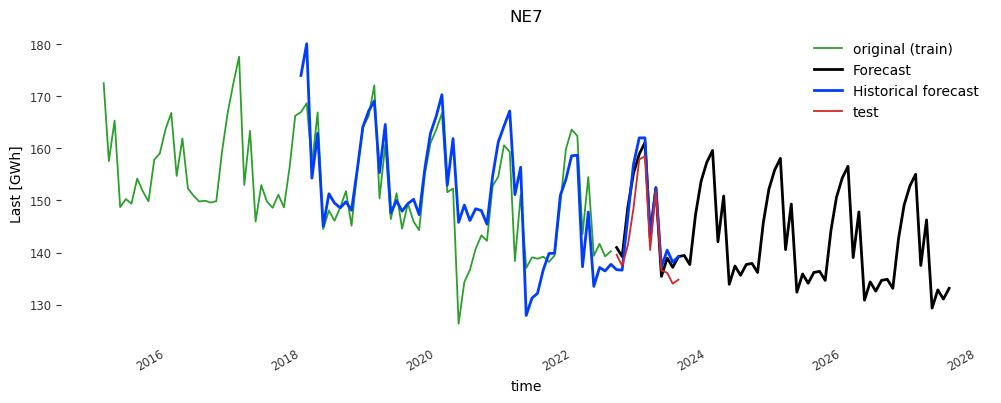

In [8]:
f, axes = plt.subplots(1, 1, figsize=(12, 4))

#axes.plot(y_pred.index.to_timestamp(how="end"), y_pred.values, color="black", label="forecast (theta)")
#axes.plot(fit.index.to_timestamp(how="end"), fit.values, color="tab:orange", label="fit (theta)")
axes.plot(pdf_train.index, pdf_train.values, color="tab:green", label="original (train)")
#axes.plot(five_years.index, five_years.values, color="tab:blue", linestyle="--",label="long term forecast (theta)")
five_years.plot(label='Forecast')
yhist.plot(label='Historical forecast')
axes.plot(pdf_test, color="tab:red", label="test")
axes.legend()
axes.set_title("NE7")
axes.set_ylabel("Last [GWh]")
axes.grid()
plt.show()

In [9]:
rmseValue = mean_squared_error(pdf_test.y.values, one_year.pd_series().values, squared=False)
rmseValue

3.6633118645824334